# Estimation of Obesity Levels

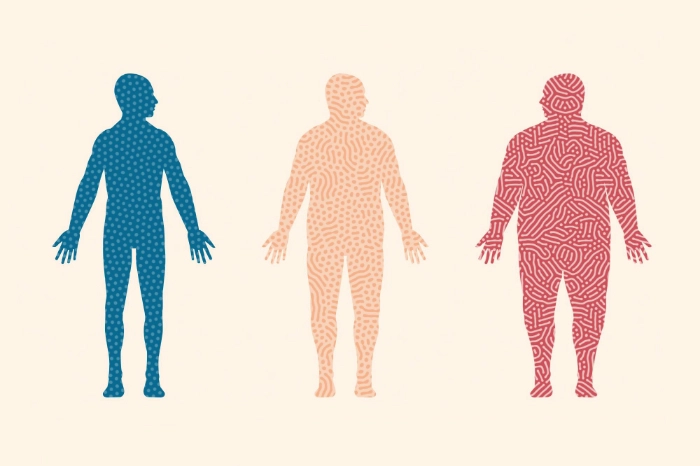

- **Dataset Source**
    - https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+


- **Context of Dataset**
    - The dataset includes data for the estimation of obesity levels of individuals from Mexico, Peru and Colombia based on their eating habits and physical condition.
    - The dataset contains 2,111 records and 17 attributes, one of which is NObesity (Obesity Level) as the class attribute. 
        - Insufficient Weight 
        - Normal Weight 
        - Overweight Level I 
        - Overweight Level II 
        - Obesity Type I 
        - Obesity Type II 
        - Obesity Type III.
    - 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.


- **Attribute Information**
    - Gender = Gender
    - Age = Age
    - Height = Height
    - Weight = Weight
    - family_history_with_overweight = Family histroy with overweight
    - FAVC = Frequent consumption of high caloric food
    - FCVC = Frequency of vegetables consumption
        - 1: Never
        - 2: Sometimes
        - 3: Always
    - NCP = Number of main meals
    - CAEC = Consumption of food between meals
    - SMOKE = Smoking status
    - CH2O = Daily water consumption
        - 1: Less than a liter
        - 2: Between 1 and 2 L
        - 3: More than 2 L
    - SCC = Calories consumption monitoring
    - FAF = Physical activity frequency
        - 0: No phyiscal activity
        - 1: 1 or 2 days
        - 2: 3 or 4 days
        - 3: 5 or more days
    - TUE = Time using technology devices
        - 0: 0 - 2 hours
        - 1: 3 - 5 hours
        - 2: More than 5 hours
    - CALC = Consumption of alcohol
    - MTRANS = Transportation used
    - NObeyesdad = Obesity Type  _**(Class Attribute)**_
    

- **Table of Content**
    - [Preparing Dataset](#Preparing)
        - [Importing Dataset](#Importing)
        - [Cleaning Synthetic Values and Preprocessing](#Preprocessing)
    
    - [Descriptive Analysis](#Descriptive)
        - [Exploring Each Type of Variables](#Exploring)
        - [Correlation Heatmap](#CorrHeatmap)
        
    - [Predictive Analysis](#Predictive)
        - [Principal Component Analysis](#PCA)
        - [Important attributes based on F-statistic](#SelectKBest)
        - [Regression Analysis (Linear)](#Linear)
            - [Predicting Weight based on Height and Obesity Type](#Linear_sub)
        - [Regression Analysis (Logistic)](#Logistic)
            - [Predicting Obesity Type (Class Attribute)](#Logistic_sub)
        - [Classification Analysis (Naive Bayes)](#NaiveBayes)
            - [Predicting Obesity Type (Class Attribute) based on Continuous Variables (Age & Weight)](#NaiveBayes_sub)
        - [Classification Analysis (Decision Tree)](#DecisionTree)
            - [Predicting Obesity Type (Class Attribute)](#DecisionTree_sub)
        - [Classification Analysis (Support Vector Machine)](#SVM)
            - [Predicting Obesity Type (Class Attribute) based on Continuous Variables (Age & Weight)](#SVM_sub)
        - [Clustering Technique (Kmeans)](#KMeans)
        - [Clustering Technique (Spectral Clustering)](#SpecClus)

## <a id='Preparing'></a>Preparing Dataset

### - <a id='Importing'></a>Importing Dataset

In [1]:
#Import base libraries for the beginning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import calendar
from datetime import datetime

In [2]:
data = pd.read_csv("https://www.dropbox.com/s/raci4a3o5vxi42h/ObesityDataSet_raw_and_data_sinthetic.csv?dl=1")

In [3]:
data.head()     # First glimpse at the dataset. 

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### - <a id='Preprocessing'></a>Cleaning Synthetic Values and Preprocessing

In [4]:
data.loc[data.Age != int]     

# It has some synthetic data that need to be transformed in appropriate data types.
# ex) float values in age

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
data.info()     

# Check the data types and any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
# Convert all object types to category type
obj_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", 
               "NObeyesdad"]

for column in obj_columns:
    data[column] = data[column].astype('category')

In [7]:
# Convert float types to the nearest integer except height and weight, since these two make sense with float values.
flt_columns = ["Age", "FCVC", "NCP", "CH2O", "TUE", "FAF"]

for column in flt_columns:
    data[column] = round(data[column]).astype('int')

In [8]:
data.info()     # All the data types are now in appropriate forms.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          2111 non-null   category
 1   Age                             2111 non-null   int64   
 2   Height                          2111 non-null   float64 
 3   Weight                          2111 non-null   float64 
 4   family_history_with_overweight  2111 non-null   category
 5   FAVC                            2111 non-null   category
 6   FCVC                            2111 non-null   int64   
 7   NCP                             2111 non-null   int64   
 8   CAEC                            2111 non-null   category
 9   SMOKE                           2111 non-null   category
 10  CH2O                            2111 non-null   int64   
 11  SCC                             2111 non-null   category
 12  FAF                 

## <a id='Descriptive'></a>Descriptive Analysis

### - <a id='Exploring'></a>Exploring Each Type of Variables

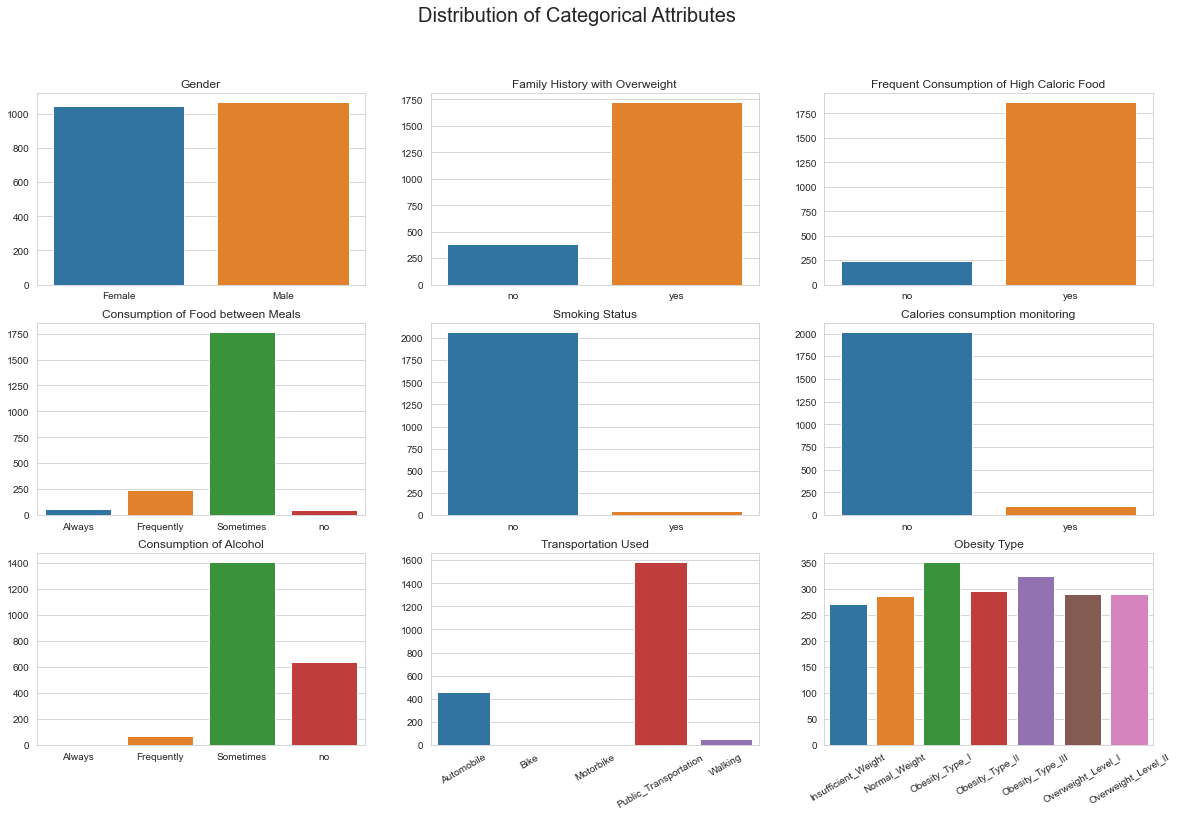

In [9]:
fig, axs = plt.subplots(3, 3, figsize = (20, 12))

cat_columns = list(data.columns[data.dtypes == 'category'])

for column, subplot in zip(cat_columns, axs.flatten()):
    sns.countplot(data[column], ax = subplot).set_title(column)
    subplot.yaxis.label.set_text("")
    subplot.xaxis.label.set_text("")
    
    if column == "family_history_with_overweight":
        sns.countplot(data[column], ax = subplot).set_title("Family History with Overweight")
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
    
    elif column == "FAVC":
        sns.countplot(data[column], ax = subplot).set_title("Frequent Consumption of High Caloric Food")
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    elif column == "CAEC":
        sns.countplot(data[column], ax = subplot).set_title("Consumption of Food between Meals")
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
    
    elif column == "SMOKE":
        sns.countplot(data[column], ax = subplot).set_title("Smoking Status")
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    elif column == "SCC":
        sns.countplot(data[column], ax = subplot).set_title("Calories consumption monitoring")
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    elif column == 'CALC':
        sns.countplot(data[column], ax = subplot).set_title("Consumption of Alcohol")
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    elif column == "MTRANS":
        sns.countplot(data[column], ax = subplot).set_title("Transportation Used")
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation = 30)
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    elif column == "NObeyesdad":
        sns.countplot(data[column], ax = subplot).set_title("Obesity Type")
        subplot.set_xticklabels(subplot.get_xticklabels(), rotation = 30)
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
fig.suptitle("Distribution of Categorical Attributes", fontsize = 20)
plt.show();

# Gender is the only categorical variable that is evenly distributed. Family history with overweight and frequent 
# consumption of high caloric food have many more 'yes' answers than 'no', while smoking status and calories 
# consumption monitoring have mostly 'no' answers. Consumption of food between meals and consumption of alcohol has 
# mostly 'sometimes' answers, and most of individuals in the dataset use public transportation with few walking or
# bike. Lastly for the obesity type, obesity type 1 was the most common followed by obesity type 3 and obesity type 2.

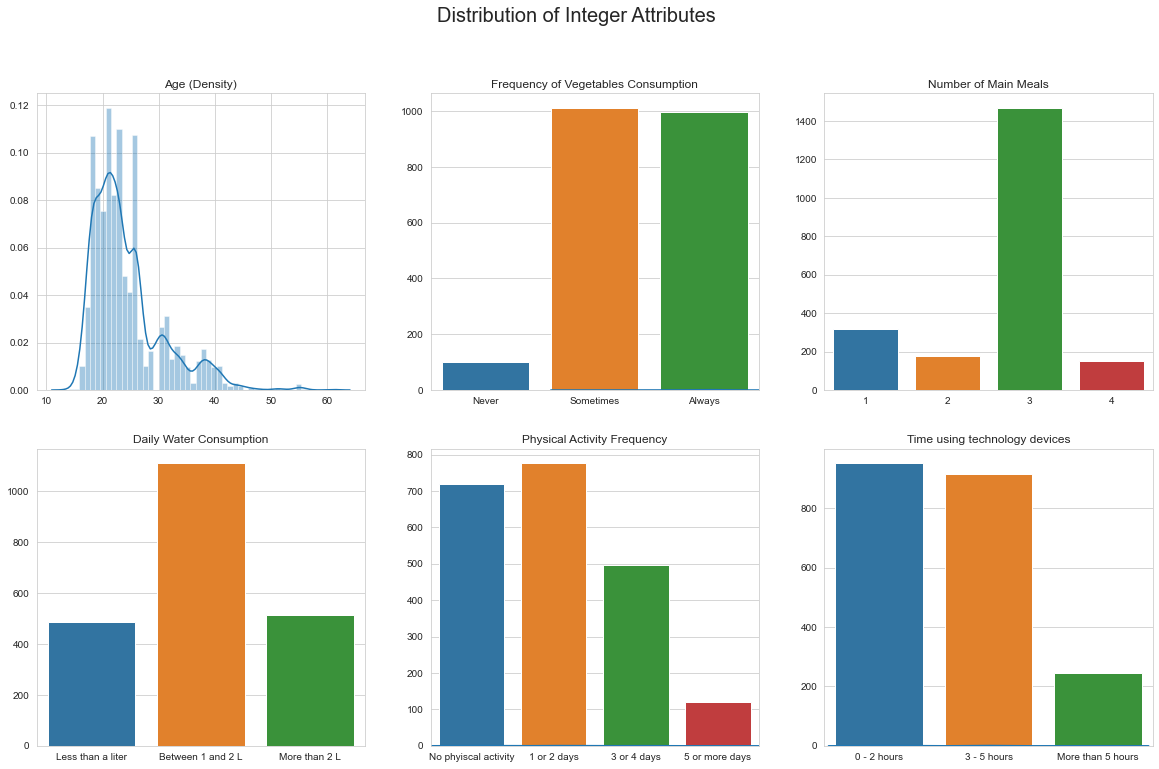

In [10]:
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(2, 3, figsize = (20, 12))

int_columns = list(data.columns[data.dtypes == 'int'])

for column, subplot in zip(int_columns, axs.flatten()):
    sns.distplot(data[column], kde = True, ax = subplot).set_title(column + " (Density)")
    subplot.yaxis.label.set_text("")
    subplot.xaxis.label.set_text("")
    
    if column == 'FCVC':
        sns.countplot(data[column], ax = subplot).set_title("Frequency of Vegetables Consumption")
        subplot.set_xticklabels(['Never', 'Sometimes', 'Always'])
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    if column == "NCP":
        sns.countplot(data[column], ax = subplot).set_title("Number of Main Meals")
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    if column == 'CH2O':
        sns.countplot(data[column], ax = subplot).set_title("Daily Water Consumption")
        subplot.set_xticklabels(["Less than a liter", "Between 1 and 2 L", "More than 2 L"])
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    if column == 'FAF':
        sns.countplot(data[column], ax = subplot).set_title("Physical Activity Frequency")
        subplot.set_xticklabels(["No phyiscal activity", "1 or 2 days", "3 or 4 days", "5 or more days"])
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
    if column == "TUE":
        sns.countplot(data[column], ax = subplot).set_title("Time using technology devices")
        subplot.set_xticklabels(["0 - 2 hours", "3 - 5 hours", "More than 5 hours"])
        subplot.yaxis.label.set_text("")
        subplot.xaxis.label.set_text("")
        
fig.suptitle("Distribution of Integer Attributes", fontsize = 20)
plt.show();

# We can see that most of the individuals are pretty young (from late teens to late 20s). They mostly consume 
# vegetable with 3 mail meals and 1 or 2 L of water in general. Also, the graph of physical activity frequency is 
# right skewed, meaning that the number of individuals who don't exercise or excercise only a couple of days per week 
# is higher than that of those who exercise more than 3 times a week.

### - <a id='CorrHeatmap'></a>Correlation Heatmap

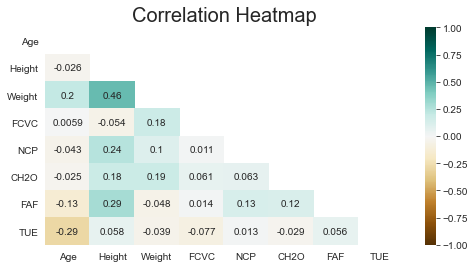

In [11]:
plt.figure(figsize=(8,4))
ax = sns.heatmap(data.corr(), mask = np.triu(data.corr()), vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set_title('Correlation Heatmap', fontsize = 20);

# There are not so many clearly correlated attributes here. Weight & height are the most correlated, followed by
# physical activity frequency (FAF) & height and number of mail meals (NCP) & height.

## <a id='Predictive'></a>Predictive Analysis

### - <a id='PCA'></a>Principal Component Analysis

In [12]:
# Get dummy variables for the category variables except the class attribute located at the last.

data_dummy = pd.get_dummies(data, columns = data.columns[data.dtypes == 'category'][:-1])
data_dummy.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'NObeyesdad', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

X_full = data_dummy.drop(columns = 'NObeyesdad', axis = 1)
y = data_dummy['NObeyesdad']

le = LabelEncoder()
y = le.fit_transform(y)     # Convert each obesity type to a number with label encoder

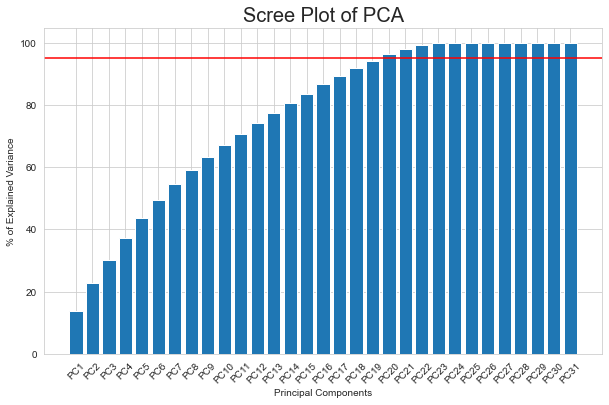

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_scaled = StandardScaler().fit_transform(X_full)
pca = PCA()
pca.fit(df_scaled)

pca_data = pca.fit_transform(df_scaled)

# Scree plot
exp_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(exp_var)+1)]

fig, ax = plt.subplots(figsize=(10,6))
plt.bar(x = range(1, len(exp_var)+1), height = np.cumsum(exp_var), tick_label = labels)
plt.axhline(y=95, color='r', linestyle='-')
plt.ylabel('% of Explained Variance')
plt.xlabel('Principal Components')
plt.xticks(rotation = 45)
plt.title('Scree Plot of PCA', fontsize = 20)
plt.show()

# With the scree plot, we can see we need at least 20 components in order to explan more than 95% of variance

### - <a id='SelectKBest'></a>Important Attributes based on F-statistics

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression 

selector = SelectKBest(f_regression, k = 20)     # 20 most important attributes according to the PCA

selector.fit(X_full, y)

SelectKBest(k=20, score_func=<function f_regression at 0x119ca6550>)

In [16]:
zipped = list(zip(X_full.columns, selector.scores_))

for i, v in sorted(zipped, key = lambda t: t[1], reverse = True):
    print("F-score of", i, "=", v)
    
# The F-score drastically drops after 6th (from CALC_no, calorie consumption monitoring - no). 

F-score of Weight = 372.955320336098
F-score of CAEC_Frequently = 297.93512770718684
F-score of CAEC_Sometimes = 235.54441671038694
F-score of family_history_with_overweight_yes = 230.14109840442578
F-score of family_history_with_overweight_no = 230.14109840442484
F-score of Age = 124.01158132223267
F-score of CALC_no = 38.98265224709959
F-score of FAF = 31.18455813004294
F-score of CALC_Sometimes = 27.820882115635573
F-score of CH2O = 25.08573710002203
F-score of CAEC_Always = 20.886747549634528
F-score of NCP = 15.482150355361192
F-score of MTRANS_Walking = 11.556783951738588
F-score of CAEC_no = 9.428964371368744
F-score of TUE = 7.379500029782012
F-score of SCC_no = 5.430575838018222
F-score of SCC_yes = 5.43057583801777
F-score of CALC_Frequently = 4.732695374533696
F-score of FAVC_yes = 4.200159013774411
F-score of FAVC_no = 4.2001590137741935
F-score of MTRANS_Automobile = 3.580758096038032
F-score of Height = 3.2103374415396995
F-score of MTRANS_Motorbike = 2.483079597102498
F-

In [17]:
print("The 20 important attributes based on F-value are:") 
print(*list(X_full.columns[selector.get_support()]), sep = '\n')

The 20 important attributes based on F-value are:
Age
Weight
NCP
CH2O
FAF
TUE
family_history_with_overweight_no
family_history_with_overweight_yes
FAVC_no
FAVC_yes
CAEC_Always
CAEC_Frequently
CAEC_Sometimes
CAEC_no
SCC_no
SCC_yes
CALC_Frequently
CALC_Sometimes
CALC_no
MTRANS_Walking


### - <a id='Linear'></a>Regression Analysis (Linear)
- <a id='Linear_sub'></a>Predicting Weight based on Height and Obesity Type

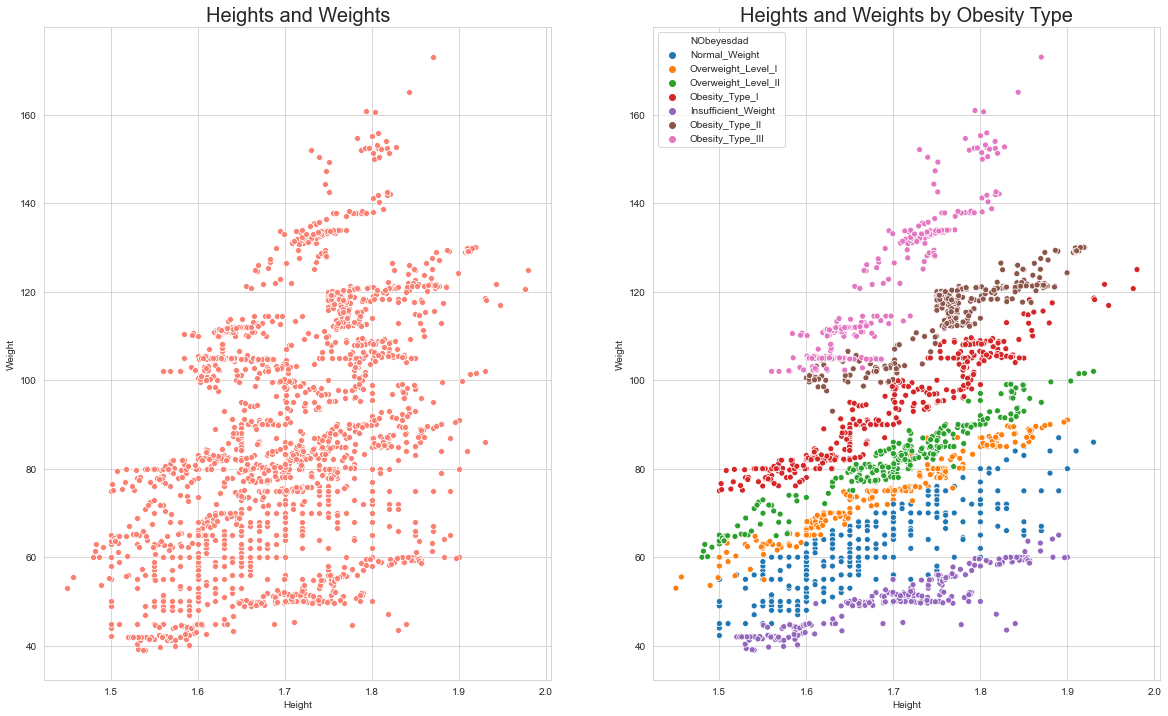

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (20,12))

sns.scatterplot(x = 'Height', y = 'Weight', data = data, ax=axes[0], color = 'salmon')
axes[0].set_title("Heights and Weights", fontsize = 20)

sns.scatterplot(x = 'Height', y = 'Weight', hue = "NObeyesdad", data = data, ax=axes[1])
axes[1].set_title("Heights and Weights by Obesity Type", fontsize = 20);

# The graph between hights and weights seems to be positively correlated, but unclear at the first glance. However,
# if we plot it by the obesity type, the patterns become much more clear. We'll build models that can predict the 
# weights based on the height and the obesity type.

In [19]:
# For the linear regression analysis, the data is split into 80% train and 20% test data by obesity type. 

from sklearn.model_selection import train_test_split

height_ob3 = data.loc[data.NObeyesdad == 'Obesity_Type_III']['Height']
height_ob3 = height_ob3[:, np.newaxis]
weight_ob3 = data.loc[data.NObeyesdad == 'Obesity_Type_III']['Weight']
ob3_X_train, ob3_X_test, ob3_y_train, ob3_y_test = train_test_split(height_ob3, weight_ob3, test_size = 0.20, 
                                                                random_state = 0)

height_ob2 = data.loc[data.NObeyesdad == 'Obesity_Type_II']['Height']
height_ob2 = height_ob2[:, np.newaxis]
weight_ob2 = data.loc[data.NObeyesdad == 'Obesity_Type_II']['Weight']
ob2_X_train, ob2_X_test, ob2_y_train, ob2_y_test = train_test_split(height_ob2, weight_ob2, test_size = 0.20, 
                                                                random_state = 0)

height_ob1 = data.loc[data.NObeyesdad == 'Obesity_Type_I']['Height']
height_ob1 = height_ob1[:, np.newaxis]
weight_ob1 = data.loc[data.NObeyesdad == 'Obesity_Type_I']['Weight']
ob1_X_train, ob1_X_test, ob1_y_train, ob1_y_test = train_test_split(height_ob1, weight_ob1, test_size = 0.20, 
                                                                random_state = 0)

height_ow2 = data.loc[data.NObeyesdad == 'Overweight_Level_II']['Height']
height_ow2 = height_ow2[:, np.newaxis]
weight_ow2 = data.loc[data.NObeyesdad == 'Overweight_Level_II']['Weight']
ow2_X_train, ow2_X_test, ow2_y_train, ow2_y_test = train_test_split(height_ow2, weight_ow2, test_size = 0.20, 
                                                                random_state = 0)

height_ow1 = data.loc[data.NObeyesdad == 'Overweight_Level_I']['Height']
height_ow1 = height_ow1[:, np.newaxis]
weight_ow1 = data.loc[data.NObeyesdad == 'Overweight_Level_I']['Weight']
ow1_X_train, ow1_X_test, ow1_y_train, ow1_y_test = train_test_split(height_ow1, weight_ow1, test_size = 0.20, 
                                                                random_state = 0)

height_normal = data.loc[data.NObeyesdad == 'Normal_Weight']['Height']
height_normal = height_normal[:, np.newaxis]
weight_normal = data.loc[data.NObeyesdad == 'Normal_Weight']['Weight']
norm_X_train, norm_X_test, norm_y_train, norm_y_test = train_test_split(height_normal, weight_normal, 
                                                                        test_size = 0.20, random_state = 0)

height_insuf = data.loc[data.NObeyesdad == 'Insufficient_Weight']['Height']
height_insuf = height_insuf[:, np.newaxis]
weight_insuf = data.loc[data.NObeyesdad == 'Insufficient_Weight']['Weight']
insuf_X_train, insuf_X_test, insuf_y_train, insuf_y_test = train_test_split(height_insuf, weight_insuf, 
                                                                            test_size = 0.20, random_state = 0)

In [20]:
# Train the models

from sklearn.linear_model import LinearRegression

ob3_model = LinearRegression()
ob3_model.fit(ob3_X_train, ob3_y_train)

ob2_model = LinearRegression()
ob2_model.fit(ob2_X_train, ob2_y_train)

ob1_model = LinearRegression()
ob1_model.fit(ob1_X_train, ob1_y_train)

ow2_model = LinearRegression()
ow2_model.fit(ow2_X_train, ow2_y_train)

ow1_model = LinearRegression()
ow1_model.fit(ow1_X_train, ow1_y_train)

norm_model = LinearRegression()
norm_model.fit(norm_X_train, norm_y_train)

insuf_model = LinearRegression()
insuf_model.fit(insuf_X_train, insuf_y_train)

LinearRegression()

In [21]:
ob3_y_pred = ob3_model.predict(ob3_X_test)
ob2_y_pred = ob2_model.predict(ob2_X_test)
ob1_y_pred = ob1_model.predict(ob1_X_test)
ow2_y_pred = ow2_model.predict(ow2_X_test)
ow1_y_pred = ow1_model.predict(ow1_X_test)
norm_y_pred = norm_model.predict(norm_X_test)
insuf_y_pred = insuf_model.predict(insuf_X_test)

In [22]:
from sklearn import metrics
from sklearn.metrics import r2_score

print("Test Accuracy of obesity type 3: {:.2f}".format(ob3_model.score(ob3_X_test, ob3_y_test)))
print("Test Accuracy of obesity type 2: {:.2f}".format(ob2_model.score(ob2_X_test, ob2_y_test)))
print("Test Accuracy of obesity type 1: {:.2f}".format(ob1_model.score(ob1_X_test, ob1_y_test)))
print("Test Accuracy of overweight level 2: {:.2f}".format(ow2_model.score(ow2_X_test, ow2_y_test)))
print("Test Accuracy of overweight level 1: {:.2f}".format(ow1_model.score(ow1_X_test, ow1_y_test)))
print("Test Accuracy of normal weight: {:.2f}".format(norm_model.score(norm_X_test, norm_y_test)))
print("Test Accuracy of insufficient weight: {:.2f}".format(insuf_model.score(insuf_X_test, insuf_y_test)))

# The accuacies are mostly pretty good. One noteworthy point is the normal weight. As the right-hand graph above shows, 
# the normal weight graph is more dispersed than any other obesity type. Therefore, its accuracy is the lowest.

Test Accuracy of obesity type 3: 0.90
Test Accuracy of obesity type 2: 0.84
Test Accuracy of obesity type 1: 0.89
Test Accuracy of overweight level 2: 0.91
Test Accuracy of overweight level 1: 0.96
Test Accuracy of normal weight: 0.71
Test Accuracy of insufficient weight: 0.89


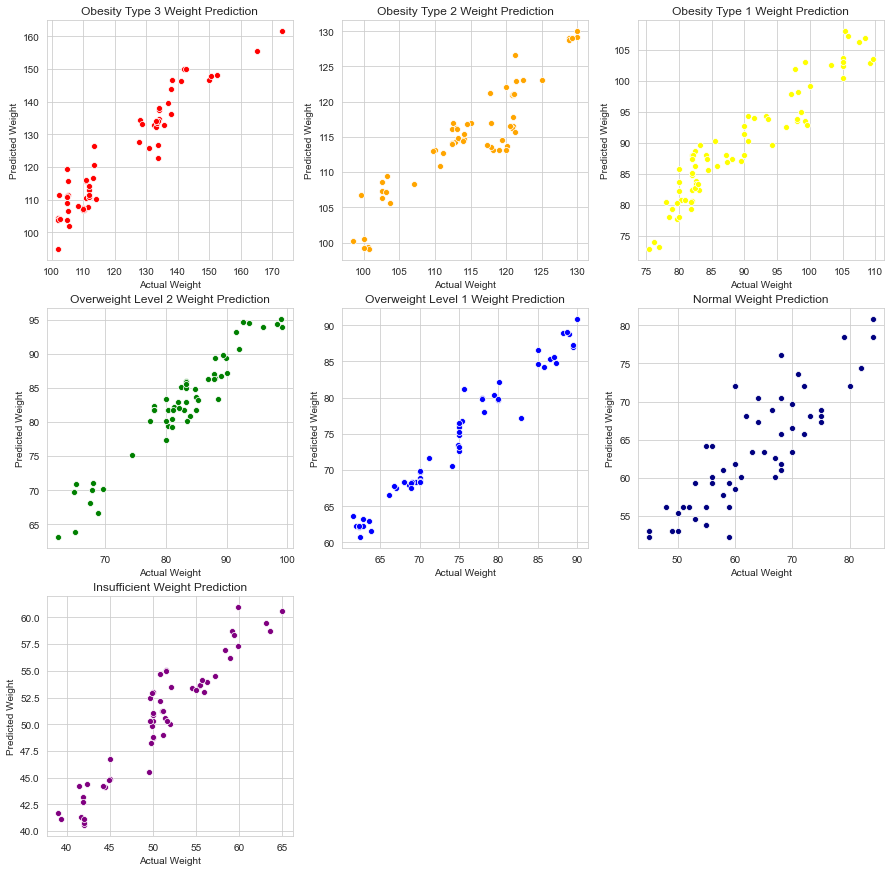

In [23]:
# Plot the comparions between predicted values and actual values of each model

fig, axes = plt.subplots(3, 3, figsize = (15,15))
axes = axes.flatten()
fig.delaxes(axes[7])
fig.delaxes(axes[8])

sns.scatterplot(x = ob3_y_test, y = ob3_y_pred, ax = axes[0], color = 'red')
axes[0].set_title("Obesity Type 3 Weight Prediction")
axes[0].set(xlabel = "Actual Weight", ylabel = "Predicted Weight")

sns.scatterplot(x = ob2_y_test, y = ob2_y_pred, ax = axes[1], color = 'orange')
axes[1].set_title("Obesity Type 2 Weight Prediction")
axes[1].set(xlabel = "Actual Weight", ylabel = "Predicted Weight")

sns.scatterplot(x = ob1_y_test, y = ob1_y_pred, ax = axes[2], color = 'yellow')
axes[2].set_title("Obesity Type 1 Weight Prediction")
axes[2].set(xlabel = "Actual Weight", ylabel = "Predicted Weight")

sns.scatterplot(x = ow2_y_test, y = ow2_y_pred, ax = axes[3], color = 'green')
axes[3].set_title("Overweight Level 2 Weight Prediction")
axes[3].set(xlabel = "Actual Weight", ylabel = "Predicted Weight")

sns.scatterplot(x = ow1_y_test, y = ow1_y_pred, ax = axes[4], color = 'blue')
axes[4].set_title("Overweight Level 1 Weight Prediction")
axes[4].set(xlabel = "Actual Weight", ylabel = "Predicted Weight")

sns.scatterplot(x = norm_y_test, y = norm_y_pred, ax = axes[5], color = 'navy')
axes[5].set_title("Normal Weight Prediction")
axes[5].set(xlabel = "Actual Weight", ylabel = "Predicted Weight")

sns.scatterplot(x = insuf_y_test, y = insuf_y_pred, ax = axes[6], color = 'purple')
axes[6].set_title("Insufficient Weight Prediction")
axes[6].set(xlabel = "Actual Weight", ylabel = "Predicted Weight");

### - <a id='Logistic'></a>Regression Analysis (Logistic) 
- <a id='Logistic_sub'></a>Predicting Obesity Type (Class Attribute)

In [24]:
# For the rest of the machine learning techniques, the target value will be the obesity type, which is our class 
# attribute. The explanatory dataset, X, is newly created according to the previous PCA and SelectKBest method based
# on the F-statistics

X = X_full[X_full.columns[selector.get_support()]]

# Same as the linear regression analysis, the proportion of train and test data is 80% and 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# We can verify that the 20 components are selected from the previous step.

(1688, 20) (423, 20) (1688,) (423,)


In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', random_state = 0)
pipe_lg = make_pipeline(StandardScaler(), clf)

pipe_lg.fit(X_train, y_train)

y_lg_pred = pipe_lg.predict(X_test)

print('Test Accuracy: {:.3f}'.format(pipe_lg.score(X_test, y_test)))

# For the logistic regression anaylsis, the accuracy was better with the standard scaler, so the pipeline is used for
# both standard scaler and logistic regression model.

Test Accuracy: 0.740


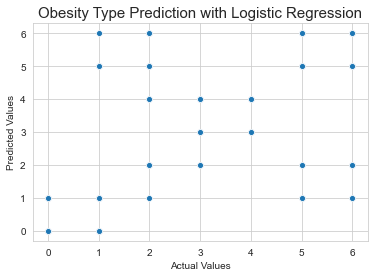

In [26]:
sns.scatterplot(x = y_test, y = y_lg_pred).set_title("Obesity Type Prediction with Logistic Regression", 
                                                     fontsize = 15)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values");

# The graph tells us that 2s (Obesity Type I) are missclassified the most followed by 1s (Nornal Weight), 5s 
# (Over Weight I) and 6s (Over Weight II)

In [27]:
# Below is the data frame with the probability of prediction.

lg_pred_values = pipe_lg.predict_proba(X_test)

lg_pred_df = pd.DataFrame(lg_pred_values, columns = np.unique(data['NObeyesdad']))
lg_pred_df

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,6.268199e-16,5.917528e-10,0.001433,9.648167e-01,3.371947e-02,6.844932e-07,0.000030
1,3.432704e-04,9.357092e-02,0.216779,5.695341e-03,1.568650e-01,2.243679e-01,0.302379
2,2.716025e-04,1.136937e-01,0.230280,3.095296e-02,2.163999e-06,4.056446e-01,0.219155
3,1.270140e-13,1.396220e-08,0.018591,1.305917e-01,8.503619e-01,1.769233e-05,0.000437
4,3.685203e-15,4.892605e-10,0.001661,2.463540e-02,9.736660e-01,9.814603e-07,0.000036
...,...,...,...,...,...,...,...
418,4.292808e-01,5.213425e-01,0.001602,6.977771e-08,1.992039e-10,3.374628e-02,0.014028
419,3.751701e-12,2.145317e-07,0.029386,4.087924e-01,5.605714e-01,9.364159e-05,0.001156
420,2.737656e-10,2.666074e-06,0.098642,1.780386e-01,7.131867e-01,9.003002e-04,0.009230
421,1.551642e-10,3.668386e-06,0.155044,4.908919e-01,3.368221e-01,1.173452e-03,0.016065


In [28]:
# To compare the probability data frame with the actual values, another data frame is created based on the test data.

y_test_2 = y_test[:, np.newaxis]

actual_list = []

for i in range(len(y_test_2)):
    if y_test_2[i] == 0:
        a = np.pad(y_test_2[i], (0,6), 'constant', constant_values = (0,0))
        a[0] = 1
        actual_list.append(a)
        
    elif y_test_2[i] == 1:
        a = np.pad(y_test_2[i], (1,5), 'constant', constant_values = (0,0))
        a[1] = 1
        actual_list.append(a)
        
    elif y_test_2[i] == 2:
        a = np.pad(y_test_2[i], (2,4), 'constant', constant_values = (0,0))
        a[2] = 1
        actual_list.append(a)
        
    elif y_test_2[i] == 3:
        a = np.pad(y_test_2[i], (3,3), 'constant', constant_values = (0,0))
        a[3] = 1
        actual_list.append(a)
        
    elif y_test_2[i] == 4:
        a = np.pad(y_test_2[i], (4,2), 'constant', constant_values = (0,0))
        a[4] = 1
        actual_list.append(a)
        
    elif y_test_2[i] == 5:
        a = np.pad(y_test_2[i], (5,1), 'constant', constant_values = (0,0))
        a[5] = 1
        actual_list.append(a)
        
    elif y_test_2[i] == 6:
        a = np.pad(y_test_2[i], (6,0), 'constant', constant_values = (0,0))
        a[6] = 1
        actual_list.append(a)

lg_actual_df = pd.DataFrame(actual_list, columns = np.unique(data['NObeyesdad']))
lg_actual_df

,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
418,0,1,0,0,0,0,0
419,0,0,0,1,0,0,0
420,0,0,0,0,1,0,0
421,0,0,0,1,0,0,0


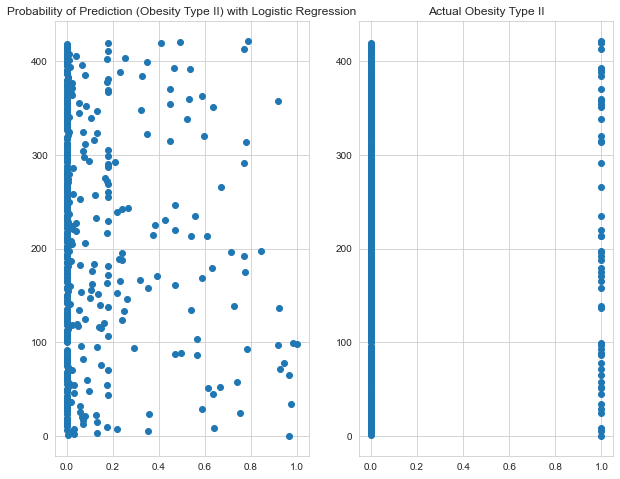

In [29]:
# To visualize comparison, as an example, below 'Obesity_Type_II' is selected for probability prediction vs. 
# actual values. We can see that most of the probabilities of individuals having obesity type II is as low as 0% with
# only a few of 100% or closer to 100% with the logistic regression.

figure, (ax1, ax2) = plt.subplots(1,2, figsize = (10,8))

ax1.scatter(lg_pred_df['Obesity_Type_II'], lg_pred_df.index)
ax1.set_xlim(-0.05,1.05)
ax1.set_title("Probability of Prediction (Obesity Type II) with Logistic Regression")

ax2.scatter(lg_actual_df['Obesity_Type_II'], lg_actual_df.index)
ax2.set_title("Actual Obesity Type II");

### - <a id='NaiveBayes'></a>Classification Analysis (Naive Bayes) 
- <a id='NaiveBayes_sub'></a>Predicting Obesity Type (Class Attribute) based on Continuous Variables (Age & Weight)

In [30]:
# For the Naive Bayes classification, in order to sufficiently visualize the models, we'll use Weight and Age as 
# they're continuous variables and two of the important attributes based on F-statistics.

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train.iloc[:, :2], y_train)

y_nb_pred = nb.predict(X_test.iloc[:, :2])

print('Test Accuracy: {:.3f}'.format(nb.score(X_test.iloc[:, :2], y_test)))

# For the Gaussian NB, the accuracy is quite low as 53%. Even when I tried it with all of 20 components with PCA, the
# accuracy was similar.

Test Accuracy: 0.534


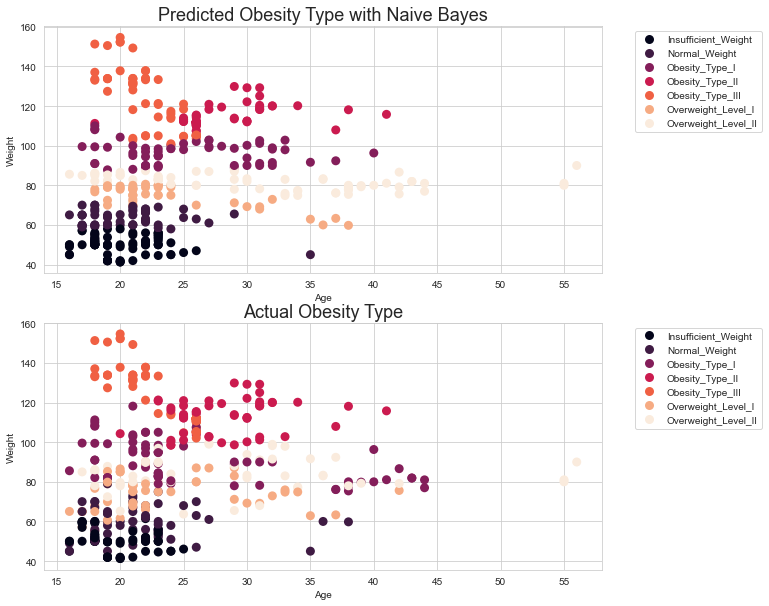

In [31]:
figure, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 10))

# Create new data frames to group values by the predicted and actual obesity types so that they generate appropriate 
# legends.

df1 = pd.DataFrame({"x":X_test.iloc[:, 0], "y":X_test.iloc[:, 1], "colors":y_nb_pred})

cmap1 = plt.cm.seismic
norm1 = plt.Normalize(df1['colors'].values.min(), df1['colors'].values.max())

# This function will convert numbers to the obesity type in the legend.
def num_to_type(i):
    if i == 0:
        i = "Insufficient_Weight"
    elif i == 1:
        i = "Normal_Weight"
    elif i == 2:
        i = "Obesity_Type_I"
    elif i == 3:
        i = "Obesity_Type_II"
    elif i == 4:
        i = "Obesity_Type_III"
    elif i == 5:
        i = "Overweight_Level_I"
    elif i == 6:
        i = "Overweight_Level_II"
    return i

sc1 = ax1.scatter(df1['x'], df1['y'], s = 81, c = df1['colors'], edgecolors = 'none')

lp1 = lambda i: plt.plot([],color = sc1.cmap(sc1.norm(i)), ms = np.sqrt(81), mec = "none", label = num_to_type(i), 
                         ls = "", marker = "o")[0]

handles1 = [lp1(i) for i in np.unique(df1["colors"])]

ax1.legend(handles = handles1, bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax1.set_title("Predicted Obesity Type with Naive Bayes", fontsize = 18)
ax1.set_xlabel("Age")
ax1.set_ylabel("Weight")


df2 = pd.DataFrame({"x":X_test.iloc[:, 0], "y":X_test.iloc[:, 1], "colors":y_test})

cmap2 = plt.cm.seismic
norm2 = plt.Normalize(df2['colors'].values.min(), df2['colors'].values.max())

sc2 = ax2.scatter(df2['x'], df2['y'], s = 81, c = df2['colors'], edgecolors = 'none')

lp2 = lambda i: plt.plot([],color = sc2.cmap(sc2.norm(i)), ms = np.sqrt(81), mec = "none", label = num_to_type(i), 
                         ls = "", marker = "o")[0]

handles2 = [lp2(i) for i in np.unique(df2["colors"])]

ax2.legend(handles = handles2, bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax2.set_title("Actual Obesity Type", fontsize = 18)
ax2.set_xlabel("Age")
ax2.set_ylabel("Weight");

# We can see that Naive Bayes 'naively' classified obesity types according to the weights neatly. Although that sounds 
# intuitive, the actual obesity types are not strictly conforming the weights only. For example, there are some 
# insufficient weight individuals who are heavier than overweight level I or II individuals (probably due to the 
# height differences). This graph shows why the accuracy of naive bayes was low.

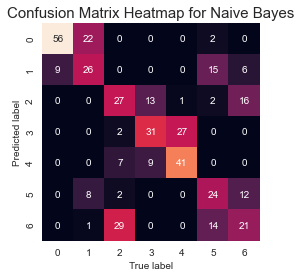

In [32]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_nb_pred)
sns.heatmap(conf_matrix.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.title("Confusion Matrix Heatmap for Naive Bayes", fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

# We can see that it gets confusing between obesity type II (3) and type III (4) with 27 misclassifications, between  
# normal weight (1) and insufficient weight (3) with 22 misclassifications, and between overweight level II (6) and 
# obesity type I (2) with 29 misclassifications. However, if you recall the weights and heights graph for linear 
# regression, they are all adjacet to each other in terms of the weights, which means those are similar enough to be 
# confusing. 

# The confusion between types that are not so similar to each other occurred between obesity type I (2) and III (4) 
# with 7 classifications. These two types are not adjacent to each other in terms of the weights.

### - <a id='DecisionTree'></a>Classification Analysis (Decision Tree)
- <a id='DecisionTree_sub'></a>Predicting Obesity Type (Class Attribute)

In [33]:
# For decision tree method, we'll include the whole attributes of the train data (20 components).

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz, plot_tree

DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_train, y_train)
y_dt_pred = DT.predict(X_test)

print('Test Accuracy: {:.3f}'.format(DT.score(X_test, y_test)))

# The decision tree method got a pretty good score as a classifier, which is 86%.

Test Accuracy: 0.856


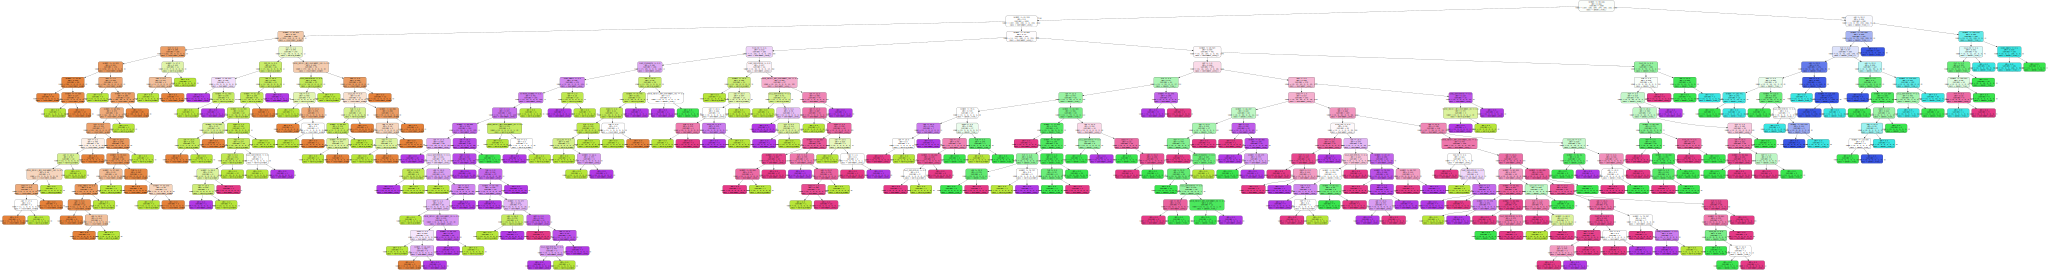

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
import graphviz
import pydotplus
import matplotlib.image as mpimg
import io

dot_data = export_graphviz(DT, out_file = None, feature_names = X_test.columns, 
                           class_names = np.unique(data['NObeyesdad']), filled = True, rounded = True)
graph = graphviz.Source(dot_data, format = "png")

graph

# This is a gigantic tree, so below another graphic is plotted in a smaller scale for the whole picture.

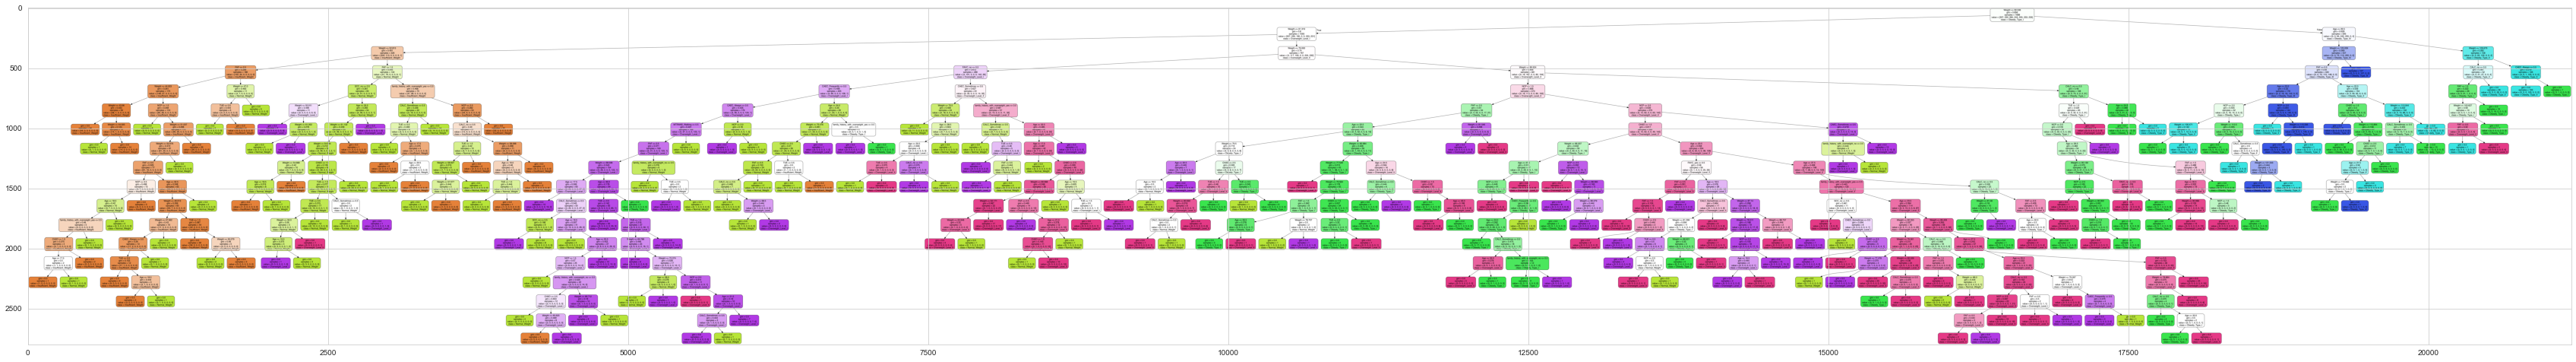

In [35]:
filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data).write_png(filename)

plt.figure(figsize=(60,60))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

# Smaller scale of decision tree

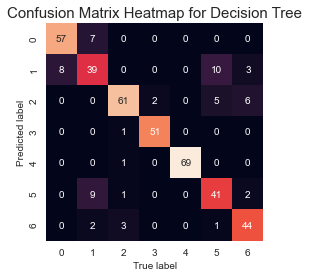

In [36]:
conf_matrix2 = confusion_matrix(y_test, y_dt_pred)
sns.heatmap(conf_matrix2.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.title("Confusion Matrix Heatmap for Decision Tree", fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

# Compared to the confusion matrix heatmap of naive bayes, decision tree's matrix heatmap looks much better. It was
# confused a bit between overweight level I (5) and normal weight (1) with 9 and 10 misclassifications, and between 
# insufficient weight (0) and normal weight (1) with 7 and 8 misclassifications. But if you recall the linear 
# regression, those two types are adjacent in terms of weights. Therefore, this confusion is understandable as they're
# similar to each other.

### - <a id='SVM'></a>Classification Analysis (Support Vector Machine)
- <a id='SVM_sub'></a>Predicting Obesity Type (Class Attribute) based on Continuous Variables (Age & Weight)

In [37]:
# Just like Naive Bayes, we'll use the two continuous variables for SVM.

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

sc = StandardScaler()
svc = SVC()

pipe_svm = Pipeline([('sc', sc), ('svc', svc)])

pipe_svm.fit(X_train.iloc[:,0:2], y_train)

y_svm_pred = pipe_svm.predict(X_test.iloc[:,0:2])

print('Test Accuracy: {:.3f}'.format(pipe_svm.score(X_test.iloc[:,0:2], y_test)))

Test Accuracy: 0.636


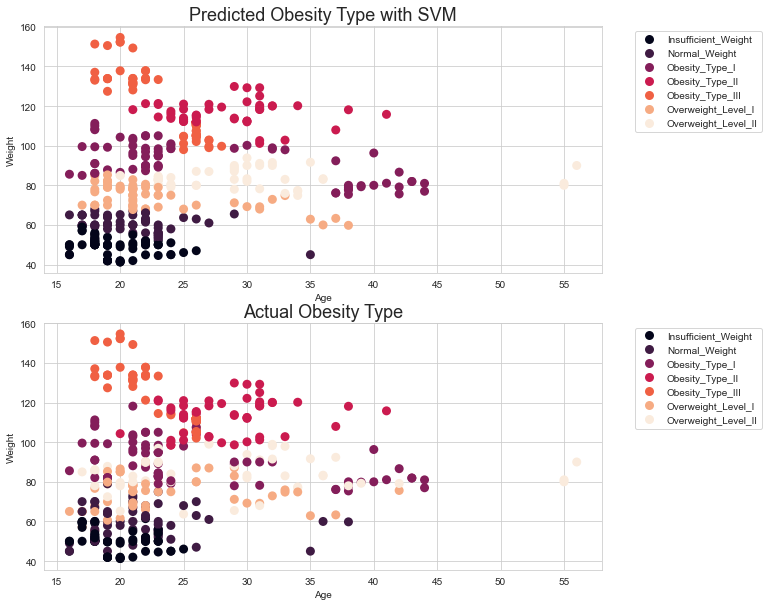

In [38]:
# Visualize the graphs in the same way with naive bayes

figure, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 10))

df3 = pd.DataFrame({"x":X_test.iloc[:, 0], "y":X_test.iloc[:, 1], "colors":y_svm_pred})

cmap3 = plt.cm.seismic
norm3 = plt.Normalize(df3['colors'].values.min(), df3['colors'].values.max())

sc3 = ax1.scatter(df3['x'], df3['y'], s = 81, c = df3['colors'], edgecolors = 'none')

lp3 = lambda i: plt.plot([],color = sc3.cmap(sc3.norm(i)), ms = np.sqrt(81), mec = "none", label = num_to_type(i), 
                         ls = "", marker = "o")[0]

handles3 = [lp3(i) for i in np.unique(df3["colors"])]

ax1.legend(handles = handles3, bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax1.set_title("Predicted Obesity Type with SVM", fontsize = 18)
ax1.set_xlabel("Age")
ax1.set_ylabel("Weight")


df4 = pd.DataFrame({"x":X_test.iloc[:, 0], "y":X_test.iloc[:, 1], "colors":y_test})

cmap4 = plt.cm.seismic
norm4 = plt.Normalize(df4['colors'].values.min(), df4['colors'].values.max())

sc4 = ax2.scatter(df4['x'], df4['y'], s = 81, c = df4['colors'], edgecolors = 'none')

lp4 = lambda i: plt.plot([],color = sc4.cmap(sc4.norm(i)), ms = np.sqrt(81), mec = "none", label = num_to_type(i), 
                         ls = "", marker = "o")[0]

handles4 = [lp4(i) for i in np.unique(df4["colors"])]

ax2.legend(handles = handles4, bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax2.set_title("Actual Obesity Type", fontsize = 18)
ax2.set_xlabel("Age")
ax2.set_ylabel("Weight");

# Similar to naive bayes, SVM also followed the weights mostly for the obesity type with several exceptions among the
# clusters, which seems to be why the accuracy is slightly better than that of naive bayes.

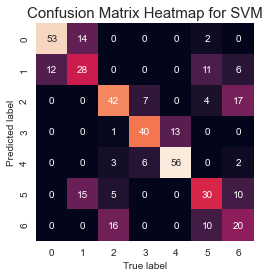

In [39]:
conf_matrix3 = confusion_matrix(y_test, y_svm_pred)
sns.heatmap(conf_matrix3.T, square = True, annot = True, fmt = 'd', cbar = False)
plt.title("Confusion Matrix Heatmap for SVM", fontsize = 15)
plt.xlabel('True label')
plt.ylabel('Predicted label');

# SVM was confused between overweight level II (6) and obesity type I (2) with 17 and 16 misclassifications, and 
# between normal weight (1) and overweight level I (5) with 15 and 11 misclassifications. Again, those are all 
# adjacent to each other in terms of the weights.

### - <a id='KMeans'></a>Clustering Technique (Kmeans)

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Random initialization (choose random clusters)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    print("Initial centers:\n", np.round(centers, 2))

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])

        print("\nNew centers:\n", np.round(new_centers, 2))
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    
    return centers, labels

In [41]:
centers, labels = find_clusters(X_test.iloc[:, :2].values, 6)

# As there are 6 obesity types, we'll put 6 for KMeans.

Initial centers:
 [[ 31.    91.05]
 [ 23.    58.5 ]
 [ 22.    62.89]
 [ 21.    69.46]
 [ 31.   119.37]
 [ 26.    47.  ]]

New centers:
 [[ 28.2   90.9 ]
 [ 22.    56.82]
 [ 19.9   62.76]
 [ 22.41  74.93]
 [ 24.98 120.66]
 [ 20.21  47.68]]

New centers:
 [[ 28.07  92.97]
 [ 23.03  56.5 ]
 [ 20.07  63.21]
 [ 23.99  77.02]
 [ 24.96 120.95]
 [ 20.05  47.83]]

New centers:
 [[ 27.72  95.78]
 [ 23.38  56.74]
 [ 20.04  64.29]
 [ 25.78  79.04]
 [ 24.83 121.23]
 [ 19.98  48.  ]]

New centers:
 [[ 26.36  97.88]
 [ 23.32  57.16]
 [ 20.29  64.99]
 [ 27.12  79.99]
 [ 24.81 121.5 ]
 [ 19.95  48.09]]

New centers:
 [[ 25.58  98.66]
 [ 22.88  57.52]
 [ 20.59  65.52]
 [ 27.55  80.5 ]
 [ 24.95 121.78]
 [ 20.    48.16]]

New centers:
 [[ 25.32  99.61]
 [ 21.73  58.16]
 [ 21.41  66.97]
 [ 27.56  80.96]
 [ 25.   122.15]
 [ 20.    48.16]]

New centers:
 [[ 25.31 100.59]
 [ 21.3   58.2 ]
 [ 21.81  68.02]
 [ 27.77  81.61]
 [ 24.97 122.52]
 [ 20.03  48.06]]

New centers:
 [[ 24.94 102.45]
 [ 21.04  58.3 ]
 [ 2

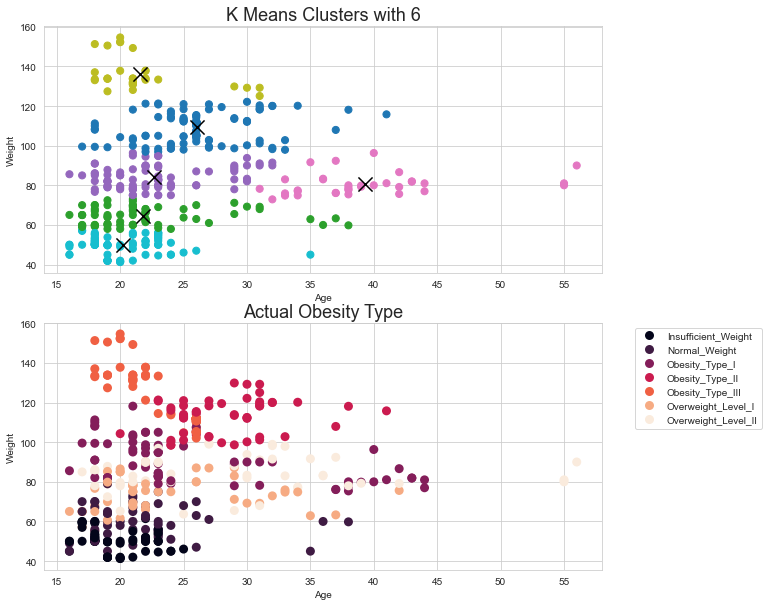

In [42]:
figure, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 10))

ax1.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c = labels, s = 50, cmap = 'tab10')
ax1.scatter(centers[:, 0], centers[:, 1], c = 'black', marker = 'x', s = 200)
ax1.set_title('K Means Clusters with 6', fontsize = 18)
ax1.set_xlabel("Age")
ax1.set_ylabel("Weight")

df4 = pd.DataFrame({"x":X_test.iloc[:, 0], "y":X_test.iloc[:, 1], "colors":y_test})

cmap4 = plt.cm.seismic
norm4 = plt.Normalize(df4['colors'].values.min(), df4['colors'].values.max())

sc4 = ax2.scatter(df4['x'], df4['y'], s = 81, c = df4['colors'], edgecolors = 'none')

lp4 = lambda i: plt.plot([],color = sc4.cmap(sc4.norm(i)), ms = np.sqrt(81), mec = "none", label = num_to_type(i), 
                         ls = "", marker = "o")[0]

handles4 = [lp4(i) for i in np.unique(df4["colors"])]

ax2.legend(handles = handles4, bbox_to_anchor = (1.05, 1), loc = 'upper left')
ax2.set_title("Actual Obesity Type", fontsize = 18)
ax2.set_xlabel("Age")
ax2.set_ylabel("Weight");

# We can compare the KMeans result and actual obesity types. KMeans clustered mostly according to the weights, one of
# which has two clusters between 70s and 90s weights.

In [43]:
n_clusters = np.arange(1, 12)

models = [KMeans(n,random_state=0).fit(X_train.iloc[:, :2]) for n in n_clusters]

metrics = [model.inertia_ for model in models]
metrics

[1216194.1458837476,
 391478.6287209824,
 219278.22058530964,
 152064.21926305778,
 121945.55916346262,
 96524.81188774716,
 75394.90109778591,
 67053.80701807029,
 59730.53589807387,
 54033.14462745263,
 48541.61763093279]

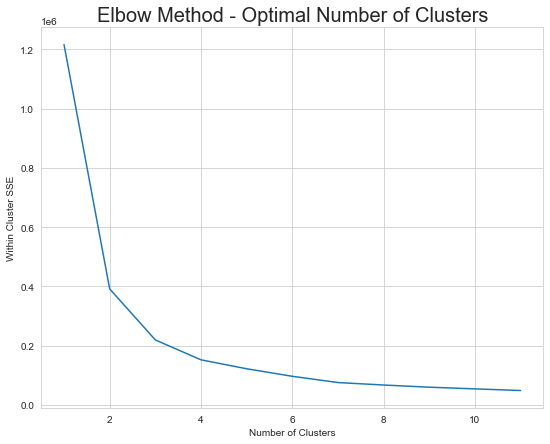

In [44]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(n_clusters, metrics, label='Interia')

plt.title("Elbow Method - Optimal Number of Clusters", fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel("Within Cluster SSE");

# The sum of squared errors drastically drops with 2 clusters, suggesting that the optimal number of clusters is 2.

### - <a id='SpecClus'></a>Clustering Technique (Spectral Clustering)

In [45]:
from sklearn.cluster import SpectralClustering

model_s = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')

labels_s = model_s.fit_predict(X_test.iloc[:, :2].values)

In [46]:
model_s.n_neighbors

10

In [47]:
aff_mat = model_s.affinity_matrix_.todense()
_, idx = np.where(aff_mat[0] != 0)
idx

array([  0,  25,  72,  78,  97, 137, 220, 233, 358, 422])

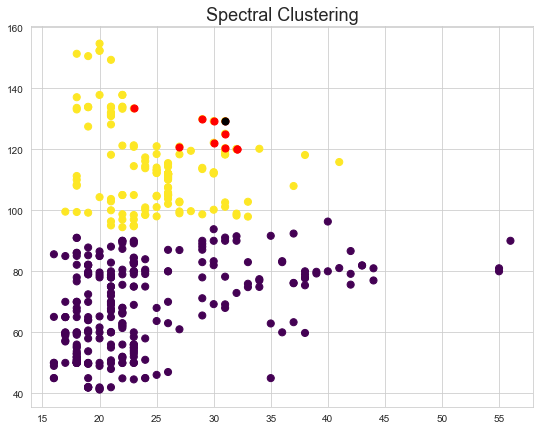

In [48]:
fig, ax = plt.subplots(figsize=(9,7))

ax.set_title('Spectral Clustering', fontsize = 18)

plt.scatter(X_test.iloc[:, 0].values, X_test.iloc[:, 1].values, c = labels_s, s = 50, cmap = 'viridis')

# affinity of first point

plt.scatter(X_test.iloc[idx,0], X_test.iloc[idx,1], c = 'r', s = 50);
plt.scatter(X_test.iloc[0,0], X_test.iloc[0,1], c='k', s=50);